In [14]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

In [15]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, X_label = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

In [16]:
X_label

array([2, 0, 0, ..., 0, 0, 1])

In [17]:
import pandas as pd

df = pd.DataFrame(X, columns=['V1','V2'])
df['Class'] = X_label
df

,V1,V2,Class
0,1.015949,-2.492290,2
1,1.069298,1.211415,0
2,2.091179,1.468466,0
3,-1.150412,-0.555557,1
4,0.525959,1.818690,0
...,...,...,...
9995,0.257390,-0.899058,2
9996,-0.683114,-2.132614,1
9997,0.107818,-0.039590,0
9998,-0.667558,0.831374,0


In [13]:
# df.to_csv('toy1.csv')

In [18]:
# Compute clustering with MeanShift
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


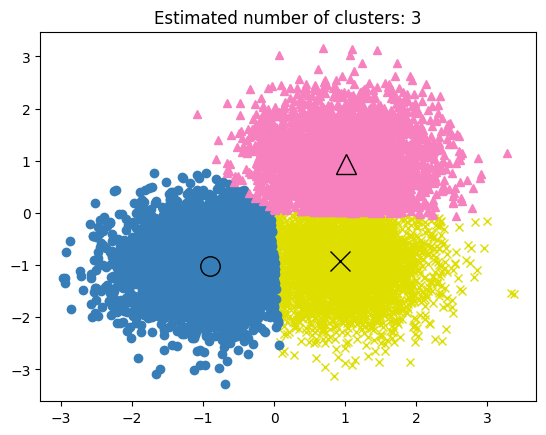

In [19]:
# Plot result

import matplotlib.pyplot as plt

plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()